#Comparison of different classification models
##wine, breastcancer, digits datasets
###1.Load Datasets(3, one in csv)
###2.preprocessing and visualization
###3.initialize classifiers: SVM(linear, poly, gaussian), Logistic Regression
###4.train and predict
###5.evaluate and compare(confusion matrix)




#Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn import datasets, linear_model, model_selection, svm, metrics
import seaborn as sns

# Loading Datasets 

In [ ]:
# 2 from sklearn and 1 from local in .csv format
brcancer= pd.read_csv("/content/data.csv")
wine_x, wine_y= datasets.load_wine(return_X_y=True)
digit_x, digit_y= datasets.load_digits(return_X_y=True)

In [ ]:
brcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
brcancer_x=brcancer.drop(columns=["id", "diagnosis","Unnamed: 32"])
brcancer_y=brcancer["diagnosis"]

In [ ]:
brcancer_y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
wine_x.shape

(178, 13)

In [ ]:
wine_y.shape

(178,)

In [ ]:
digit_x.shape

(1797, 64)

In [ ]:
digit_y.shape

(1797,)

In [ ]:
brcancer_x.shape

(569, 30)

In [ ]:
brcancer_y.shape

(569,)

# Visualization of data

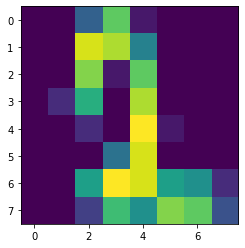

In [ ]:
image_temp=np.reshape(digit_x[12],(8,8))
plt.imshow(image_temp)

In [ ]:
digit_y[12]

2

In [ ]:
brcancer_x.iloc[0]

radius_mean                  17.990000
texture_mean                 10.380000
perimeter_mean              122.800000
area_mean                  1001.000000
smoothness_mean               0.118400
compactness_mean              0.277600
concavity_mean                0.300100
concave points_mean           0.147100
symmetry_mean                 0.241900
fractal_dimension_mean        0.078710
radius_se                     1.095000
texture_se                    0.905300
perimeter_se                  8.589000
area_se                     153.400000
smoothness_se                 0.006399
compactness_se                0.049040
concavity_se                  0.053730
concave points_se             0.015870
symmetry_se                   0.030030
fractal_dimension_se          0.006193
radius_worst                 25.380000
texture_worst                17.330000
perimeter_worst             184.600000
area_worst                 2019.000000
smoothness_worst              0.162200
compactness_worst        

In [ ]:
wine_x[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

# Splitting datasets

In [ ]:
brcancer_x_train,brcancer_x_test, brcancer_y_train,  brcancer_y_test= model_selection.train_test_split(brcancer_x, brcancer_y, test_size=0.2)
wine_x_train, wine_x_test, wine_y_train, wine_y_test=model_selection.train_test_split(wine_x, wine_y, test_size=0.2)
digit_x_train, digit_x_test, digit_y_train, digit_y_test=model_selection.train_test_split(digit_x,digit_y,test_size=0.2)
 

# Initialization of training models

In [ ]:
#logistic regression classification
brcancer_reg= linear_model.LogisticRegression(max_iter=200)
wine_reg= linear_model.LogisticRegression(max_iter=200)
digit_reg=linear_model.LogisticRegression(max_iter=200)

In [ ]:
#SVC(gaussian)
brcancer_svc_gaussian= svm.SVC(kernel="rbf")
wine_svc_gaussian= svm.SVC(kernel="rbf")
digit_svc_gaussian=svm.SVC(kernel="rbf")

In [ ]:
#SVC(sigmoid)
brcancer_svc_sigmoid=svm.SVC(kernel="sigmoid")
wine_svc_sigmoid=svm.SVC(kernel="sigmoid")
digit_svc_sigmoid=svm.SVC(kernel="sigmoid")

In [ ]:
#SVC(polynomial)
brcancer_svc_poly= svm.SVC(kernel="poly", degree=3)
wine_svc_poly=svm.SVC(kernel="poly", degree=3)
digit_svc_poly=svm.SVC(kernel="poly",degree=3)

# Training the models

In [ ]:
# logistic regression training
brcancer_reg.fit(brcancer_x_train,brcancer_y_train)
wine_reg.fit(wine_x_train, wine_y_train)
digit_reg.fit(digit_x_train,digit_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# SVC gaussian training
brcancer_svc_gaussian.fit(brcancer_x_train,brcancer_y_train)
wine_svc_gaussian.fit(wine_x_train,wine_y_train)
digit_svc_gaussian.fit(digit_x_train, digit_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVC sigmoid training
brcancer_svc_sigmoid.fit(brcancer_x_train,brcancer_y_train)
wine_svc_sigmoid.fit(wine_x_train, wine_y_train)
digit_svc_sigmoid.fit(digit_x_train,digit_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#SVC polynomial training
brcancer_svc_poly.fit(brcancer_x_train,brcancer_y_train)
wine_svc_poly.fit(wine_x_train, wine_y_train)
digit_svc_poly.fit(digit_x_train,digit_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Prediction

In [ ]:
# breast_cancer
brcancer_pred_reg= brcancer_reg.predict(brcancer_x_test)
brcancer_pred_svc_gaussian= brcancer_svc_gaussian.predict(brcancer_x_test)
brcancer_pred_svc_sigmoid= brcancer_svc_sigmoid.predict(brcancer_x_test)
brcancer_pred_svc_poly=brcancer_svc_poly.predict(brcancer_x_test)

In [ ]:
# wine
wine_pred_reg=wine_reg.predict(wine_x_test)
wine_pred_svc_gaussian=wine_svc_gaussian.predict(wine_x_test)
wine_pred_svc_sigmoid=wine_svc_sigmoid.predict(wine_x_test)
wine_pred_svc_poly=wine_svc_poly.predict(wine_x_test)


In [ ]:
#digits
digit_pred_reg=digit_reg.predict(digit_x_test)
digit_pred_svc_gaussian=digit_svc_gaussian.predict(digit_x_test)
digit_pred_svc_sigmoid=digit_svc_sigmoid.predict(digit_x_test)
digit_pred_svc_poly=digit_svc_poly.predict(digit_x_test)

#Score

In [ ]:
#breast cancer
print("Scores of different models in breast_cancer datset:" )
br_score_reg=brcancer_reg.score(brcancer_x_test,brcancer_y_test)
print(f"Logistic Regression Score= {br_score_reg}")
br_score_svc_gaussian=brcancer_svc_gaussian.score(brcancer_x_test,brcancer_y_test)
print(f"Gaussian SVC Score= {br_score_svc_gaussian}")
br_score_svc_sigmoid=brcancer_svc_sigmoid.score(brcancer_x_test,brcancer_y_test)
print(f"Sigmoid SVC Score= {br_score_svc_sigmoid}")
br_score_svc_poly=brcancer_svc_poly.score(brcancer_x_test,brcancer_y_test)
print(f"Polynomial SVC Score= {br_score_svc_poly}")

Scores of different models in breast_cancer datset:
Logistic Regression Score= 0.9473684210526315
Gaussian SVC Score= 0.8859649122807017
Sigmoid SVC Score= 0.4473684210526316
Polynomial SVC Score= 0.8859649122807017


In [ ]:
#wine
print("Scores of different models in wine datset:" )
wine_score_reg=wine_reg.score(wine_x_test,wine_y_test)
print(f"Logistic Regression Score= {wine_score_reg}")
wine_score_svc_gaussian=wine_svc_gaussian.score(wine_x_test,wine_y_test)
print(f"Gaussian SVC Score= {wine_score_svc_gaussian}")
wine_score_svc_sigmoid=wine_svc_sigmoid.score(wine_x_test,wine_y_test)
print(f"Sigmoid SVC Score= {wine_score_svc_sigmoid}")
wine_score_svc_poly=wine_svc_poly.score(wine_x_test,wine_y_test)
print(f"Polynomial SVC Score= {wine_score_svc_poly}")

Scores of different models in wine datset:
Logistic Regression Score= 0.9722222222222222
Gaussian SVC Score= 0.6944444444444444
Sigmoid SVC Score= 0.1111111111111111
Polynomial SVC Score= 0.7222222222222222


In [ ]:
#digit
print("Scores of different models in digit datset:" )
digit_score_reg=digit_reg.score(digit_x_test,digit_y_test)
print(f"Logistic Regression Score= {digit_score_reg}")
digit_score_svc_gaussian=digit_svc_gaussian.score(digit_x_test,digit_y_test)
print(f"Gaussian SVC Score= {digit_score_svc_gaussian}")
digit_score_svc_sigmoid=digit_svc_sigmoid.score(digit_x_test,digit_y_test)
print(f"Sigmoid SVC Score= {digit_score_svc_sigmoid}")
digit_score_svc_poly=digit_svc_poly.score(digit_x_test,digit_y_test)
print(f"Polynomial SVC Score= {digit_score_svc_poly}")

Scores of different models in digit datset:
Logistic Regression Score= 0.9555555555555556
Gaussian SVC Score= 0.9916666666666667
Sigmoid SVC Score= 0.9138888888888889
Polynomial SVC Score= 0.9944444444444445


# Confusion Matrix

 Confusion Matrix for breast_cancer dataset


Text(0.5, 24.0, 'Predicted label')

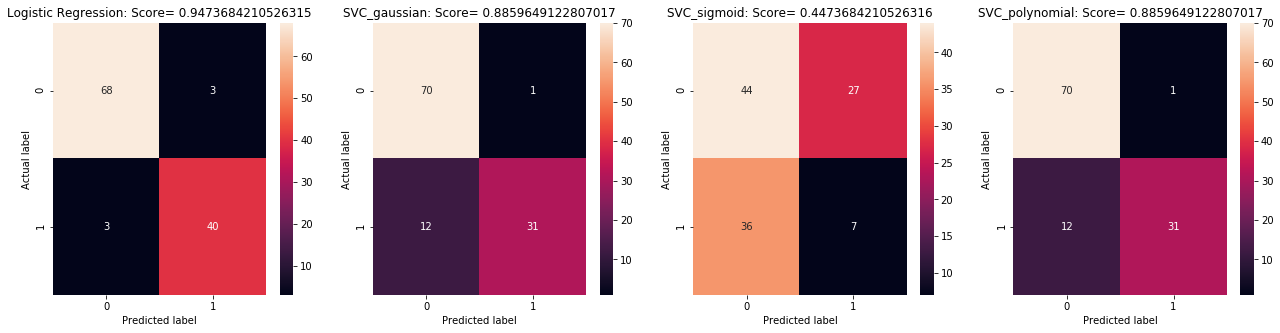

In [ ]:
# breast_cancer
br_cm_reg= metrics.confusion_matrix(brcancer_y_test, brcancer_pred_reg)
br_cm_svc_gaussian= metrics.confusion_matrix(brcancer_y_test, brcancer_pred_svc_gaussian)
br_cm_svc_sigmoid= metrics.confusion_matrix(brcancer_y_test,brcancer_pred_svc_sigmoid)
br_cm_svc_poly= metrics.confusion_matrix(brcancer_y_test, brcancer_pred_svc_poly)
print(" Confusion Matrix for breast_cancer dataset")
plt.figure(figsize=[22,5])
plt.subplot(1,4,1)
sns.heatmap(br_cm_reg, annot=True)
plt.title(f"Logistic Regression: Score= {br_score_reg}")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.subplot(1,4,2)
plt.title(f"SVC_gaussian: Score= {br_score_svc_gaussian}")
sns.heatmap(br_cm_svc_gaussian, annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.subplot(1,4,3)
plt.title(f"SVC_sigmoid: Score= {br_score_svc_sigmoid}")
sns.heatmap(br_cm_svc_sigmoid, annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.subplot(1,4,4)
plt.title(f"SVC_polynomial: Score= {br_score_svc_poly}")
sns.heatmap(br_cm_svc_poly, annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

 Confusion Matrix for wine dataset


Text(0.5, 24.0, 'Predicted label')

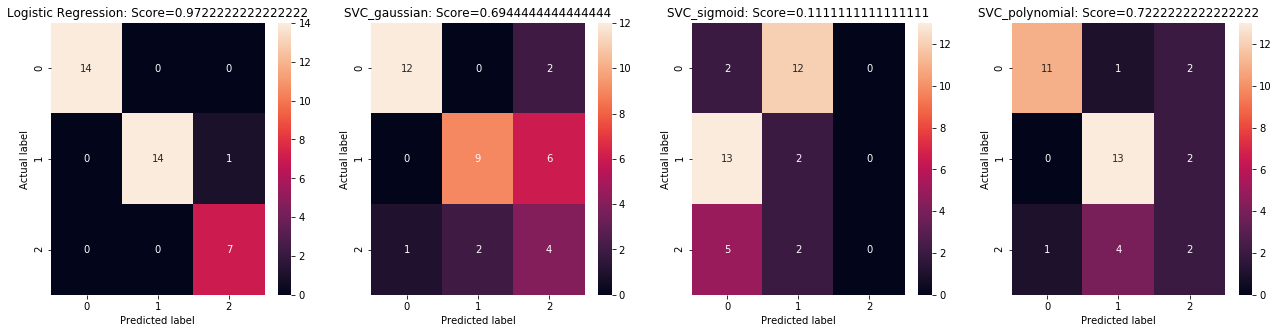

In [ ]:
# wine
wine_cm_reg= metrics.confusion_matrix(wine_y_test, wine_pred_reg)
wine_cm_svc_gaussian= metrics.confusion_matrix(wine_y_test, wine_pred_svc_gaussian)
wine_cm_svc_sigmoid= metrics.confusion_matrix(wine_y_test,wine_pred_svc_sigmoid)
wine_cm_svc_poly= metrics.confusion_matrix(wine_y_test, wine_pred_svc_poly)
print(" Confusion Matrix for wine dataset")
plt.figure(figsize=[22,5])
plt.subplot(1,4,1)
sns.heatmap(wine_cm_reg, annot=True)
plt.title(f"Logistic Regression: Score={wine_score_reg}")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.subplot(1,4,2)
plt.title(f"SVC_gaussian: Score={wine_score_svc_gaussian}")
sns.heatmap(wine_cm_svc_gaussian, annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.subplot(1,4,3)
plt.title(f"SVC_sigmoid: Score={wine_score_svc_sigmoid}")
sns.heatmap(wine_cm_svc_sigmoid, annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.subplot(1,4,4)
plt.title(f"SVC_polynomial: Score={wine_score_svc_poly}")
sns.heatmap(wine_cm_svc_poly, annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

 Confusion Matrix for digits dataset


Text(0.5, 24.0, 'Predicted label')

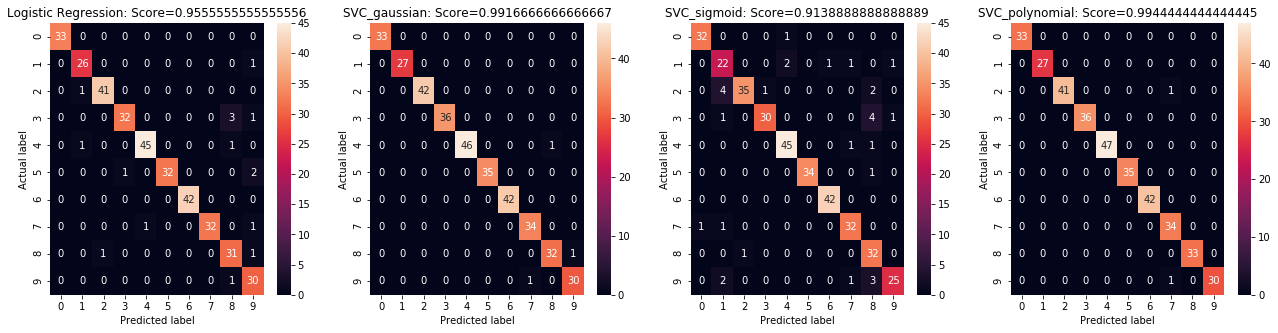

In [ ]:
# digits
digit_cm_reg= metrics.confusion_matrix(digit_y_test, digit_pred_reg)
digit_cm_svc_gaussian= metrics.confusion_matrix(digit_y_test, digit_pred_svc_gaussian)
digit_cm_svc_sigmoid= metrics.confusion_matrix(digit_y_test,digit_pred_svc_sigmoid)
digit_cm_svc_poly= metrics.confusion_matrix(digit_y_test, digit_pred_svc_poly)
print(" Confusion Matrix for digits dataset")
plt.figure(figsize=[22,5])
plt.subplot(1,4,1)
sns.heatmap(digit_cm_reg, annot=True)
plt.title(f"Logistic Regression: Score={digit_score_reg}")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.subplot(1,4,2)
plt.title(f"SVC_gaussian: Score={digit_score_svc_gaussian}")
sns.heatmap(digit_cm_svc_gaussian, annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.subplot(1,4,3)
plt.title(f"SVC_sigmoid: Score={digit_score_svc_sigmoid}")
sns.heatmap(digit_cm_svc_sigmoid, annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.subplot(1,4,4)
plt.title(f"SVC_polynomial: Score={digit_score_svc_poly}")
sns.heatmap(digit_cm_svc_poly, annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")